In [ ]:
import pandas as pd
import numpy as np

import tensorflow as tf
import transformers 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import sklearn
from sklearn.metrics import confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_json("News_Category_Dataset_v3.json", lines=True)
dataset


,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22
...,...,...,...,...,...,...
209522,https://www.huffingtonpost.com/entry/rim-ceo-t...,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,TECH,Verizon Wireless and AT&T are already promotin...,"Reuters, Reuters",2012-01-28
209523,https://www.huffingtonpost.com/entry/maria-sha...,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,"Afterward, Azarenka, more effusive with the pr...",,2012-01-28
209524,https://www.huffingtonpost.com/entry/super-bow...,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,"Leading up to Super Bowl XLVI, the most talked...",,2012-01-28
209525,https://www.huffingtonpost.com/entry/aldon-smi...,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,CORRECTION: An earlier version of this story i...,,2012-01-28


In [ ]:
print("The dataset contains", dataset.category.nunique(), "categories.")


The dataset contains 42 categories.


In [ ]:
dataset.category.value_counts()

POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3653
WOMEN              3572
CRIME              3562
IMPACT             3484
DIVORCE            3426
WORLD NEWS         3299
MEDIA              2944
WEIRD NEWS         2777
GREEN              2622
WORLDPOST          2579
RELIGION           2577
STYLE              2254
SCIENCE            2206
TECH               2104
TASTE              2096
MONEY              1756
ARTS               1509
ENVIRONMENT        1444
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
ARTS & CULTURE     1339
COLLEGE            1144
LATINO VOICES      1130
CULTURE & ARTS     1074
EDUCATION       

In [ ]:
print("Category target: ", dataset["category"][0])
print("Headline: ", dataset["headline"][0])
print("Description: ", dataset["short_description"][0])

Category target:  U.S. NEWS
Headline:  Over 4 Million Americans Roll Up Sleeves For Omicron-Targeted COVID Boosters
Description:  Health experts said it is too early to predict whether demand would match up with the 171 million doses of the new boosters the U.S. ordered for the fall.


Text(0.5, 1.0, 'Category distribution')

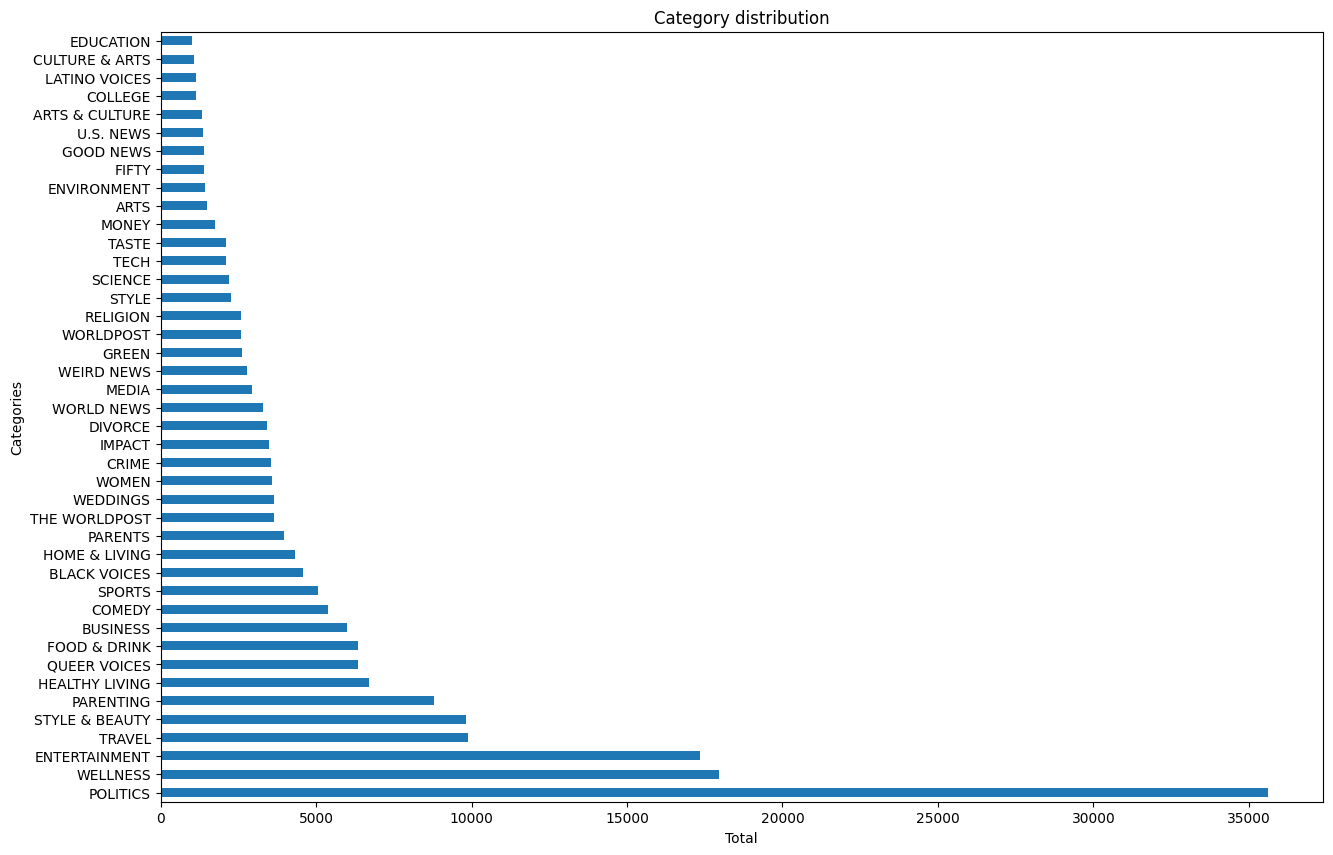

In [ ]:
dataset.category.value_counts().plot(kind='barh', figsize=(15,10))
plt.xlabel("Total")
plt.ylabel("Categories")
plt.title("Category distribution")

In [ ]:
dataset["category"] = dataset.category.replace(
    {
        "THE WORLDPOST": "WORLD NEWS",
        "WORLDPOST": "WORLD NEWS",
        "ARTS": "ARTS & CULTURE",
        "CULTURE & ARTS": "ARTS & CULTURE",
        "HEALTHY LIVING": "WELLNESS",
        "QUEER VOICES ": "VOICES",
        "LATINO VOICES": "VOICES",
        "BLACK VOICES": "VOICES",
        "STYLE": "STYLE & BEATUY",
        "GREEN": "ENVIRONMENT",
        "TASTE": "FOOD & DRINK",
        "MONEY": "BUSINESS",
        "PARENTING": "PARENTS"
    }
)

In [ ]:
print("The dataset contains", dataset.category.nunique(), "categories.")

The dataset contains 32 categories.


In [ ]:
dataset.category.value_counts()


POLITICS          35602
WELLNESS          24639
ENTERTAINMENT     17362
PARENTS           12746
TRAVEL             9900
STYLE & BEAUTY     9814
WORLD NEWS         9542
FOOD & DRINK       8436
BUSINESS           7748
QUEER VOICES       6347
VOICES             5713
COMEDY             5400
SPORTS             5077
HOME & LIVING      4320
ENVIRONMENT        4066
ARTS & CULTURE     3922
WEDDINGS           3653
WOMEN              3572
CRIME              3562
IMPACT             3484
DIVORCE            3426
MEDIA              2944
WEIRD NEWS         2777
RELIGION           2577
STYLE & BEATUY     2254
SCIENCE            2206
TECH               2104
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
COLLEGE            1144
EDUCATION          1014
Name: category, dtype: int64

In [ ]:
politics_to_remove = dataset[dataset['category'] == 'POLITICS'].sample(25_000, random_state=1).index
wellness_to_remove = dataset[dataset['category'] == 'WELLNESS'].sample(14_000, random_state=1).index
entertainment_to_remove = dataset[dataset['category'] == 'ENTERTAINMENT'].sample(7_000, random_state=1).index
parents_to_remove = dataset[dataset['category'] == 'PARENTS'].sample(2_000, random_state=1).index

In [ ]:
dataset = dataset.drop(politics_to_remove)
dataset = dataset.drop(wellness_to_remove)
dataset = dataset.drop(entertainment_to_remove)
dataset = dataset.drop(parents_to_remove)

In [ ]:
dataset.category.value_counts()

PARENTS           10746
WELLNESS          10639
POLITICS          10602
ENTERTAINMENT     10362
TRAVEL             9900
STYLE & BEAUTY     9814
WORLD NEWS         9542
FOOD & DRINK       8436
BUSINESS           7748
QUEER VOICES       6347
VOICES             5713
COMEDY             5400
SPORTS             5077
HOME & LIVING      4320
ENVIRONMENT        4066
ARTS & CULTURE     3922
WEDDINGS           3653
WOMEN              3572
CRIME              3562
IMPACT             3484
DIVORCE            3426
MEDIA              2944
WEIRD NEWS         2777
RELIGION           2577
STYLE & BEATUY     2254
SCIENCE            2206
TECH               2104
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
COLLEGE            1144
EDUCATION          1014
Name: category, dtype: int64

Text(0.5, 1.0, 'Category distribution')

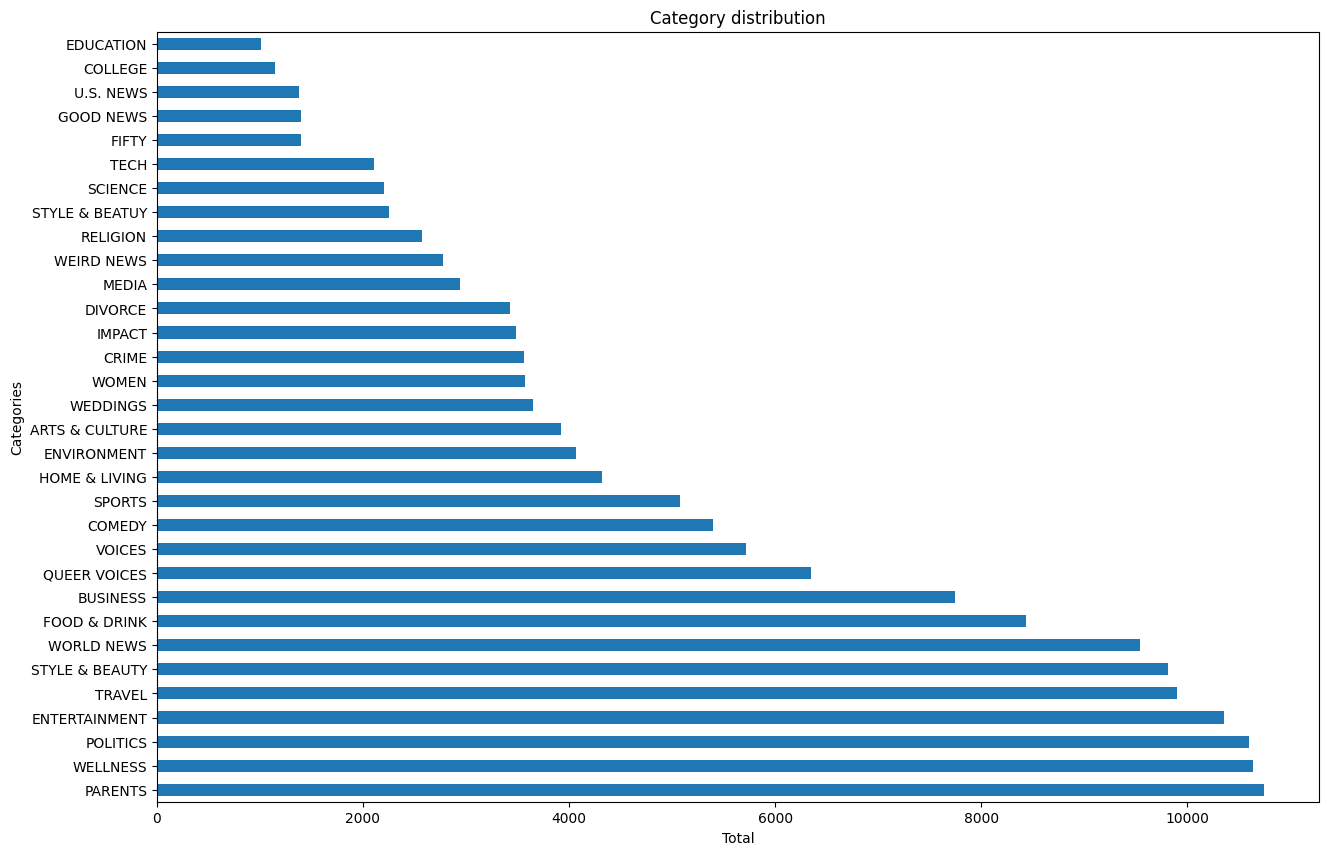

In [ ]:
dataset.category.value_counts().plot(kind='barh', figsize=(15,10))
plt.xlabel("Total")
plt.ylabel("Categories")
plt.title("Category distribution")

In [ ]:
dataset.category.unique()

array(['U.S. NEWS', 'COMEDY', 'PARENTS', 'WORLD NEWS', 'ARTS & CULTURE',
       'TECH', 'SPORTS', 'ENTERTAINMENT', 'POLITICS', 'WEIRD NEWS',
       'ENVIRONMENT', 'EDUCATION', 'CRIME', 'SCIENCE', 'BUSINESS',
       'WELLNESS', 'STYLE & BEAUTY', 'FOOD & DRINK', 'MEDIA',
       'QUEER VOICES', 'HOME & LIVING', 'WOMEN', 'VOICES', 'TRAVEL',
       'RELIGION', 'IMPACT', 'WEDDINGS', 'COLLEGE', 'STYLE & BEATUY',
       'GOOD NEWS', 'FIFTY', 'DIVORCE'], dtype=object)

In [ ]:
# How many reviews do we have?
print('There are', dataset.shape[0], 'data in this dataset')

# Do we have duplicates?
print('Number of Duplicates:', len(dataset[dataset.duplicated()]))

There are 161527 data in this dataset
Number of Duplicates: 9


In [ ]:
dataset[dataset.duplicated(keep=False)]

,link,headline,category,short_description,authors,date
67901,https://www.huffingtonpost.comhttp://gizmodo.c...,Former Facebook Workers: We Routinely Suppress...,TECH,Facebook workers routinely suppressed news sto...,,2016-05-09
67923,https://www.huffingtonpost.comhttp://gizmodo.c...,Former Facebook Workers: We Routinely Suppress...,TECH,Facebook workers routinely suppressed news sto...,,2016-05-09
70234,https://www.huffingtonpost.comhttp://www.cnbc....,"On Equal Pay Day, The Gap Is Still Too Wide",WOMEN,Equal Pay Day falls on April 12 in 2016. It's ...,,2016-04-12
70239,https://www.huffingtonpost.comhttp://www.cnbc....,"On Equal Pay Day, The Gap Is Still Too Wide",WOMEN,Equal Pay Day falls on April 12 in 2016. It's ...,,2016-04-12
145141,https://www.huffingtonpost.comhttp://www.weath...,10 Cities That Could Run Out Of Water - Weathe...,ENVIRONMENT,"Securing access to plentiful, renewable source...",,2013-12-15
145142,https://www.huffingtonpost.comhttp://www.weath...,10 Cities That Could Run Out Of Water - Weathe...,ENVIRONMENT,"Securing access to plentiful, renewable source...",,2013-12-15
178154,https://www.huffingtonpost.comhttp://www.busin...,Google Is Attacking Apple From The Inside Out ...,TECH,After years of hammering away at Apple's share...,,2013-01-01
178155,https://www.huffingtonpost.comhttp://www.busin...,Google Is Attacking Apple From The Inside Out ...,TECH,After years of hammering away at Apple's share...,,2013-01-01
194595,https://www.huffingtonpost.comhttp://blogs.wsj...,Apple Removes Green EPEAT Electronics Certific...,TECH,Apple has pulled its products off the U.S. gov...,,2012-07-07
194596,https://www.huffingtonpost.comhttp://blogs.wsj...,Apple Removes Green EPEAT Electronics Certific...,TECH,Apple has pulled its products off the U.S. gov...,,2012-07-07


In [ ]:
len(dataset)

161527

In [ ]:
dataset = dataset.drop_duplicates()

In [ ]:
len(dataset)

161518

In [ ]:
dataset["full_text"] = dataset["headline"].astype(str) + ". " + dataset["short_description"].astype(str)

In [ ]:
dataset

,link,headline,category,short_description,authors,date,full_text
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23,Over 4 Million Americans Roll Up Sleeves For O...
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23,"American Airlines Flyer Charged, Banned For Li..."
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23,23 Of The Funniest Tweets About Cats And Dogs ...
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTS,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23,The Funniest Tweets From Parents This Week (Se...
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22,Woman Who Called Cops On Black Bird-Watcher Lo...
...,...,...,...,...,...,...,...
209522,https://www.huffingtonpost.com/entry/rim-ceo-t...,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,TECH,Verizon Wireless and AT&T are already promotin...,"Reuters, Reuters",2012-01-28,RIM CEO Thorsten Heins' 'Significant' Plans Fo...
209523,https://www.huffingtonpost.com/entry/maria-sha...,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,"Afterward, Azarenka, more effusive with the pr...",,2012-01-28,Maria Sharapova Stunned By Victoria Azarenka I...
209524,https://www.huffingtonpost.com/entry/super-bow...,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,"Leading up to Super Bowl XLVI, the most talked...",,2012-01-28,"Giants Over Patriots, Jets Over Colts Among M..."
209525,https://www.huffingtonpost.com/entry/aldon-smi...,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,CORRECTION: An earlier version of this story i...,,2012-01-28,Aldon Smith Arrested: 49ers Linebacker Busted ...


In [ ]:
dataset["text_lengths"] = dataset["full_text"].map(lambda x: len(x))
dataset

,link,headline,category,short_description,authors,date,full_text,text_lengths
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23,Over 4 Million Americans Roll Up Sleeves For O...,232
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23,"American Airlines Flyer Charged, Banned For Li...",250
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23,23 Of The Funniest Tweets About Cats And Dogs ...,135
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTS,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23,The Funniest Tweets From Parents This Week (Se...,217
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22,Woman Who Called Cops On Black Bird-Watcher Lo...,235
...,...,...,...,...,...,...,...,...
209522,https://www.huffingtonpost.com/entry/rim-ceo-t...,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,TECH,Verizon Wireless and AT&T are already promotin...,"Reuters, Reuters",2012-01-28,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,184
209523,https://www.huffingtonpost.com/entry/maria-sha...,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,"Afterward, Azarenka, more effusive with the pr...",,2012-01-28,Maria Sharapova Stunned By Victoria Azarenka I...,193
209524,https://www.huffingtonpost.com/entry/super-bow...,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,"Leading up to Super Bowl XLVI, the most talked...",,2012-01-28,"Giants Over Patriots, Jets Over Colts Among M...",222
209525,https://www.huffingtonpost.com/entry/aldon-smi...,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,CORRECTION: An earlier version of this story i...,,2012-01-28,Aldon Smith Arrested: 49ers Linebacker Busted ...,175


In [ ]:
dataset.groupby("category")["text_lengths"].mean().sort_values(ascending=False)

category
FIFTY             235.875089
EDUCATION         222.154832
WELLNESS          210.142213
IMPACT            210.045637
WEDDINGS          204.612921
TRAVEL            204.532424
DIVORCE           202.470228
PARENTS           202.449563
BUSINESS          195.136293
COLLEGE           192.255245
STYLE & BEAUTY    191.858628
U.S. NEWS         188.657952
ENVIRONMENT       184.338253
ARTS & CULTURE    177.809281
QUEER VOICES      176.089964
HOME & LIVING     172.397222
WOMEN             168.906189
WORLD NEWS        168.448858
VOICES            165.338526
RELIGION          164.608071
TECH              163.862381
SCIENCE           162.616500
POLITICS          162.223354
MEDIA             150.520041
FOOD & DRINK      148.525960
CRIME             147.473891
SPORTS            143.959031
ENTERTAINMENT     138.747057
COMEDY            134.585741
GOOD NEWS         124.397711
WEIRD NEWS        109.806626
STYLE & BEATUY    107.185004
Name: text_lengths, dtype: float64

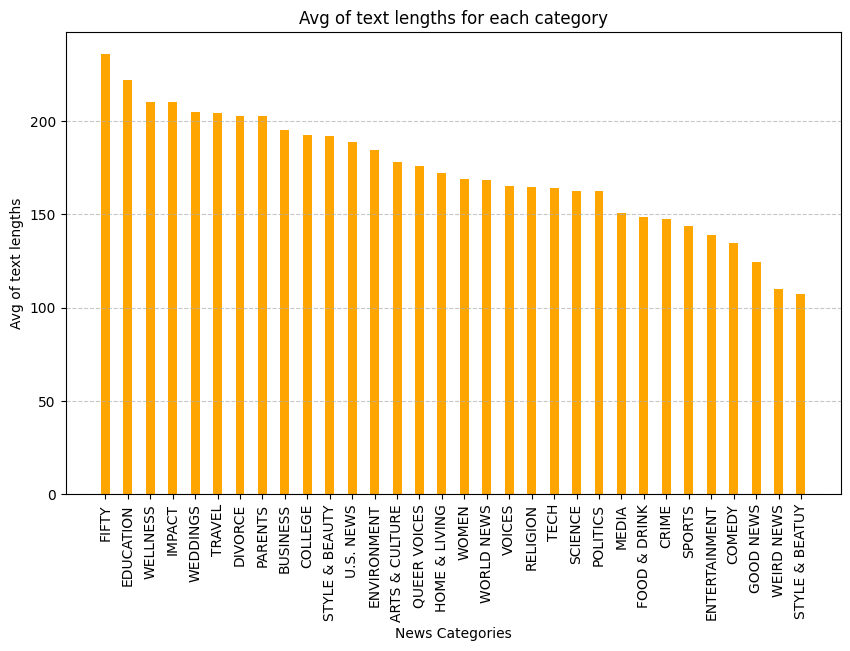

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(dataset.groupby("category")["text_lengths"].mean().sort_values(ascending=False).index,
                        dataset.groupby("category")["text_lengths"].mean().sort_values(ascending=False).values,
                        color ='orange',
                        width = 0.4)

plt.xticks(rotation=90, ha='center')
plt.xlabel("News Categories")
plt.ylabel("Avg of text lengths")
plt.title("Avg of text lengths for each category")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [ ]:
cat_encoder = LabelEncoder()
dataset["categoryID"] = cat_encoder.fit_transform(dataset["category"])
dataset

,link,headline,category,short_description,authors,date,full_text,text_lengths,categoryID
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23,Over 4 Million Americans Roll Up Sleeves For O...,232,25
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23,"American Airlines Flyer Charged, Banned For Li...",250,25
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23,23 Of The Funniest Tweets About Cats And Dogs ...,135,3
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTS,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23,The Funniest Tweets From Parents This Week (Se...,217,15
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22,Woman Who Called Cops On Black Bird-Watcher Lo...,235,25
...,...,...,...,...,...,...,...,...,...
209522,https://www.huffingtonpost.com/entry/rim-ceo-t...,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,TECH,Verizon Wireless and AT&T are already promotin...,"Reuters, Reuters",2012-01-28,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,184,23
209523,https://www.huffingtonpost.com/entry/maria-sha...,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,"Afterward, Azarenka, more effusive with the pr...",,2012-01-28,Maria Sharapova Stunned By Victoria Azarenka I...,193,20
209524,https://www.huffingtonpost.com/entry/super-bow...,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,"Leading up to Super Bowl XLVI, the most talked...",,2012-01-28,"Giants Over Patriots, Jets Over Colts Among M...",222,20
209525,https://www.huffingtonpost.com/entry/aldon-smi...,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,CORRECTION: An earlier version of this story i...,,2012-01-28,Aldon Smith Arrested: 49ers Linebacker Busted ...,175,20


TRAINING

In [ ]:
text_data = pd.DataFrame()

text_data["text"] = dataset["full_text"]
text_data["label"] = dataset["categoryID"]

In [ ]:
text_data

,text,label
0,Over 4 Million Americans Roll Up Sleeves For O...,25
1,"American Airlines Flyer Charged, Banned For Li...",25
2,23 Of The Funniest Tweets About Cats And Dogs ...,3
3,The Funniest Tweets From Parents This Week (Se...,15
4,Woman Who Called Cops On Black Bird-Watcher Lo...,25
...,...,...
209522,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,23
209523,Maria Sharapova Stunned By Victoria Azarenka I...,20
209524,"Giants Over Patriots, Jets Over Colts Among M...",20
209525,Aldon Smith Arrested: 49ers Linebacker Busted ...,20


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(text_data["text"], text_data["label"], test_size=0.20, stratify=text_data["label"])

In [ ]:
X_train.head()

74258     Angela Bassett Recalls Her Oscar Night: 'I Did...
185679    House Tour: Designer Suzi West Makes The Most ...
164426    How A Photographer Captured His Own Marriage P...
182190    Rachel McAdams's Best Beauty Looks (PHOTOS). T...
107664    Never-Before-Seen Works By Surrealist Master S...
Name: text, dtype: object

In [ ]:
Y_train[:5]

74258     26
185679    12
164426    27
182190    22
107664     0
Name: label, dtype: int64

BERT MODEL

In [ ]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
max_len = 128

In [ ]:
X_train_encoded = tokenizer(
    text=X_train.tolist(),
    add_special_tokens=True,
    max_length=max_len,
    truncation=True,
    padding='max_length',
    return_tensors='tf',
    return_token_type_ids=False,
    return_attention_mask=True,
    verbose=True
)

In [ ]:
X_train_encoded

{'input_ids': <tf.Tensor: shape=(129214, 128), dtype=int32, numpy=
array([[  101, 10516,  7716, ...,     0,     0,     0],
       [  101,  1585,  3124, ...,     0,     0,     0],
       [  101,  1731,   138, ...,     0,     0,     0],
       ...,
       [  101,   156,  1643, ...,     0,     0,     0],
       [  101, 20164,  3101, ...,     0,     0,     0],
       [  101, 20729,  4880, ...,     0,     0,     0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(129214, 128), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>}

In [ ]:
Y_train_encoded = tf.keras.utils.to_categorical(Y_train, num_classes=32, dtype='int32')

In [ ]:
X_test_encoded = tokenizer(
    text=X_test.tolist(),
    add_special_tokens=True,
    max_length=max_len,
    truncation=True,
    padding='max_length', #length of 100
    return_tensors='tf',
    return_token_type_ids=False,
    return_attention_mask=True,
    verbose=True
)

In [ ]:
Y_test_encoded = tf.keras.utils.to_categorical(Y_test, num_classes=32, dtype='int32')

In [ ]:
# Create a tf.data.Dataset from the tokenized data
dataset = tf.data.Dataset.from_tensor_slices(({
    'input_ids': X_train_encoded['input_ids'],
    'attention_mask': X_train_encoded['attention_mask'],
}, Y_train))  # y_train should contain the corresponding labels

# Shuffle and batch the dataset
batch_size = 128 # You can adjust this batch size according to your preference
train_ds = dataset.shuffle(buffer_size=len(X_train_encoded)).batch(batch_size).prefetch(1)

In [ ]:
train_ds

<_PrefetchDataset element_spec=({'input_ids': TensorSpec(shape=(None, 128), dtype=tf.int32, name=None), 'attention_mask': TensorSpec(shape=(None, 128), dtype=tf.int32, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
for x in train_ds:
    print(x)
    break

({'input_ids': <tf.Tensor: shape=(128, 128), dtype=int32, numpy=
array([[  101,  1585,  3124, ...,     0,     0,     0],
       [  101,  1731,   138, ...,     0,     0,     0],
       [  101, 10516,  7716, ...,     0,     0,     0],
       ...,
       [  101, 15101, 13063, ...,     0,     0,     0],
       [  101,  6667, 10567, ...,     0,     0,     0],
       [  101, 11050,  3341, ...,     0,     0,     0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(128, 128), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>}, <tf.Tensor: shape=(128,), dtype=int64, numpy=
array([12, 27, 26,  0,  7, 27, 22,  1, 10,  3, 21, 12, 30, 17, 31, 28,  0,
       29, 16, 16, 22, 29, 28, 16, 22, 17, 22, 16, 24,  3, 31, 30, 30, 21,
       14, 10, 16, 31, 29,  7, 22, 31, 22,  3, 31,  7, 29, 13, 16, 24,  1,
       16, 



```
# MODEL
```



In [ ]:
from transformers import TFBertModel

def build_bert_model(num_classes):
    input_ids = tf.keras.layers.Input(shape=(max_len,), dtype=tf.int32, name="input_ids")
    attention_mask = tf.keras.layers.Input(shape=(max_len), dtype=tf.int32, name="attention_mask")
    #bert layer
    bert = TFBertModel.from_pretrained('bert-base-cased')
    embeddings = bert(input_ids, attention_mask = attention_mask)[0] # 0 = last hidden state, 1 = puller_output
    #other layers
    out = tf.keras.layers.GlobalMaxPool1D()(embeddings)
    out = tf.keras.layers.Dense(256, activation='relu')(out)
    out = tf.keras.layers.Dropout(0.1)(out)
    y = tf.keras.layers.Dense(num_classes, activation='softmax')(out)
    #model
    model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=y)

    model.layers[2].trainable = True


    optimizer = tf.keras.optimizers.Adam(
        learning_rate=0.001, # HF recommendation
        epsilon=1e-08
    )

    model.compile(
        optimizer=optimizer,
        loss = "sparse_categorical_crossentropy",
        metrics = "accuracy"
    )

    return model

In [ ]:
model = build_bert_model(32)
model.summary()


model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 128)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 128)]                0         []                            
 )                                                                                                
                                                                                                  
 tf_bert_model (TFBertModel  TFBaseModelOutputWithPooli   1083102   ['input_ids[0][0]',           
 )                           ngAndCrossAttentions(last_   72         'attention_mask[0][0]']      
                             hidden_state=(None, 128, 7                                       

In [ ]:
history = model.fit(
    [X_train_encoded['input_ids'], X_train_encoded['attention_mask']], Y_train,
    epochs=4,
    validation_split=0.1,
    batch_size = 64
)

Epoch 1/4
1818/1818 [==============================] - 2906s 2s/step - loss: 3.2800 - accuracy: 0.0648 - val_loss: 3.3997 - val_accuracy: 0.0608
Epoch 2/4
1818/1818 [==============================] - 2886s 2s/step - loss: 3.2688 - accuracy: 0.0662 - val_loss: 3.4893 - val_accuracy: 0.0608
Epoch 3/4
1818/1818 [==============================] - 2877s 2s/step - loss: 3.2681 - accuracy: 0.0651 - val_loss: 3.5575 - val_accuracy: 0.0608
Epoch 4/4
1818/1818 [==============================] - 2872s 2s/step - loss: 3.2671 - accuracy: 0.0663 - val_loss: 3.5441 - val_accuracy: 0.0608


In [ ]:
model.save("bert_fine_tuned.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
